In [1]:
print('Hello, world!')

Hello, world!


In [43]:
# Here's an explicit example
dog_name = 'Buster'
print(dog_name)
print('Woof')

Buster
Woof


In [53]:
class Dog:
    def __init__(self, name, breed):
        self.name = name
        self.breed = breed
    
    def woof(self):
        return(f'{self.name} says woof!')
    
    def __add__(self, other):
        return (f'Cross between {self.breed} and {other.breed}')


dog1 = Dog('John', 'Labrador')
dog2 = Dog('Butterfly', 'XL_bully')

print(labrador.name)
print(xl_bully.name)
print(labrador.woof())
print(xl_bully.woof())

print(dog1 + dog2)

John
Butterfly
John says woof!
Butterfly says woof!
Cross between labrador and XL_bully


In [55]:
# Now task class with creating a class to represent records of student grades
# Say we have the following code
student_1_name = 'Alice'
student_1_age = 20
student_1_grades = [90, 85, 88]  # A list of grades

def calculate_average(grades):
    return sum(grades) / len(grades)

student_1_average_grade = calculate_average(student_1_grades)

# How would this process look for 10 students?
student_2_name = 'Adam'
student_2_age = 20
student_2_grades = [75, 95, 60] 
student_2_average_grades = calculate_average(student_2_grades)

# Now I task you to write a class which can handle this behaviour alot faster.

class Student:
    def __init__(self, name, age, grades):
        self.name = name
        self.age = age
        self.grades = grades

    def calculate_average(self):
        return sum(self.grades) / len(self.grades)

student_1 = Student('Alice', 20, [90, 85, 88])
student_2 = Student('Adam', 20, [75, 95, 60] )

In [3]:
# A class serves as a way to create objects in python. An object is just something which holds data
# and functions which operate on that data. 
# The whole point of a class is that it allows us to create reusable pieces of code.

# There are two aspects to the Class, the __init__ or initialisation of the class and the methods of the 
# parts where there is a def. 
# Starting with the def we can define a function, which you can think of in the same way as a mathematical
# function, in that you will give it some input and modify it in some way and get an output.

# We first write class and the name of the class
class Value:
    # This is the intialisation method it will initialise the Value object with the data passed to it.
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

Further resources to learn more:
Mark Lutz - Learning Python powerful object-oriented programming 
https://www.youtube.com/watch?v=YYXdXT2l-Gg&list=PL-osiE80TeTskrapNbzXhwoFUiLCjGgY7

<h1>Visualisation of backprop and model training</h1>

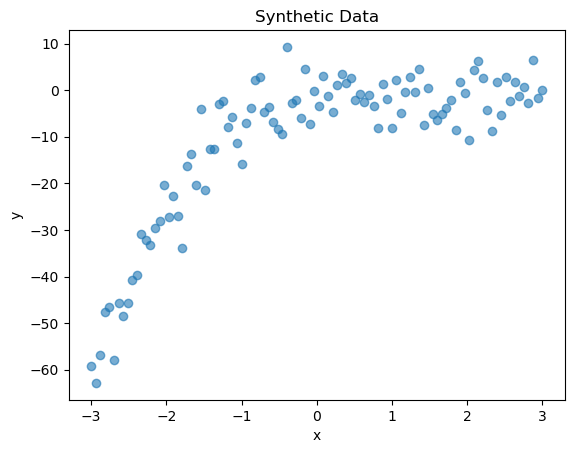

In [29]:
plt.scatter(x_data, y_data, label='Synthetic Data', alpha=0.6)
plt.title('Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

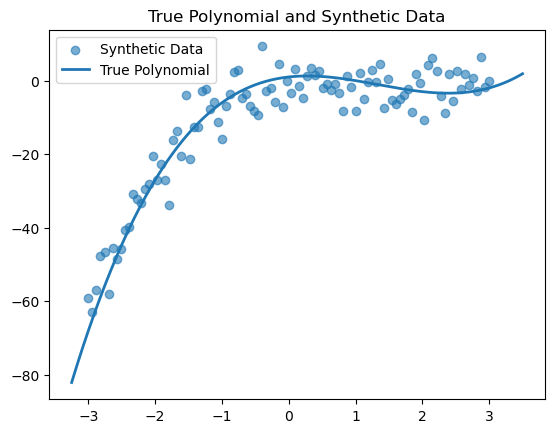

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define polynomial function: f(x) = x^3 - 4x^2 + 2x + 1
def true_polynomial(x):
    return x**3 - 4*x**2 + 2*x + 1

# Generate synthetic data
np.random.seed(0)
x_data = np.linspace(-3, 3, 100)
y_data = true_polynomial(x_data) + np.random.normal(scale=5, size=len(x_data))

# Plot the true polynomial and synthetic data
plt.scatter(x_data, y_data, label='Synthetic Data', alpha=0.6)
x_range = np.linspace(-3.25, 3.5, 400)
plt.plot(x_range, true_polynomial(x_range), label='True Polynomial', linewidth=2)
plt.legend()
plt.title('True Polynomial and Synthetic Data')
plt.show()


In [40]:
# !pip install torch
import torch
import torch.nn as nn
import torch.optim as optim

# Define neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Initialize model, loss function, and optimizer
input_dim, hidden_dim, output_dim = 1, 50, 1
model = SimpleNN(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Convert data to PyTorch tensors
x_tensor = torch.FloatTensor(x_data).view(-1, 1)
y_tensor = torch.FloatTensor(y_data).view(-1, 1)


loss: 419.6162414550781


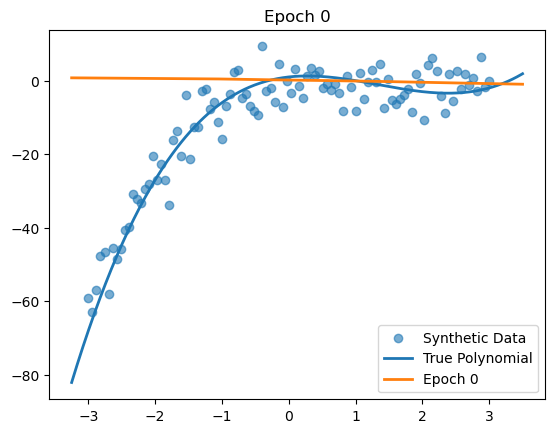

loss: 110.36653137207031


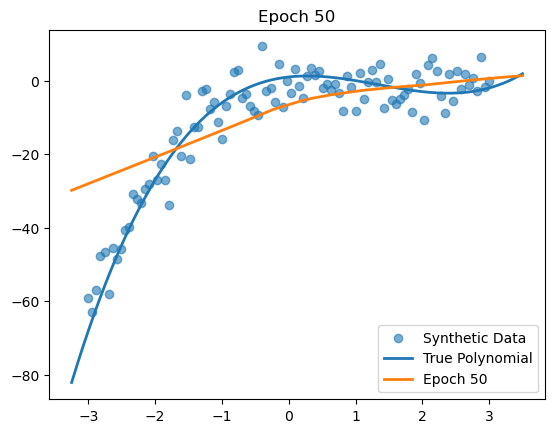

loss: 49.490909576416016


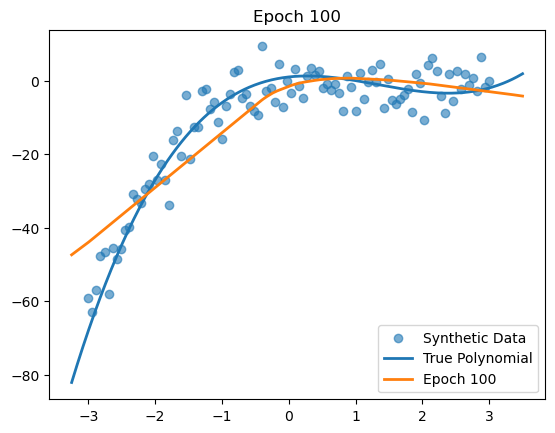

loss: 34.8073844909668


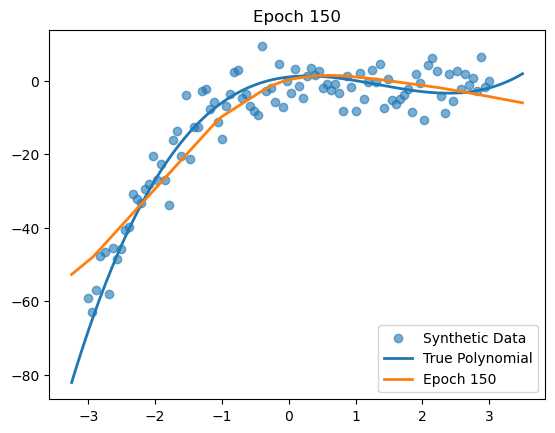

loss: 26.911603927612305


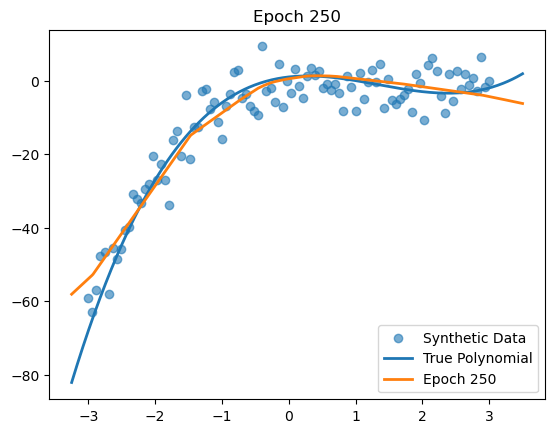

loss: 22.1132755279541


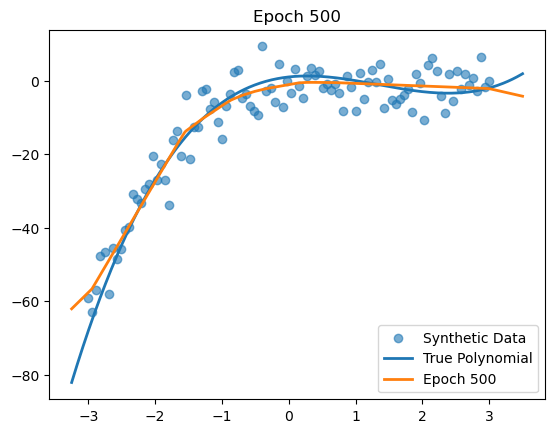

loss: 21.58202362060547


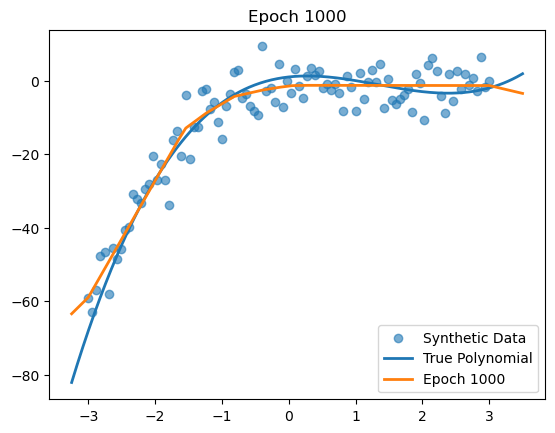

loss: 21.553264617919922


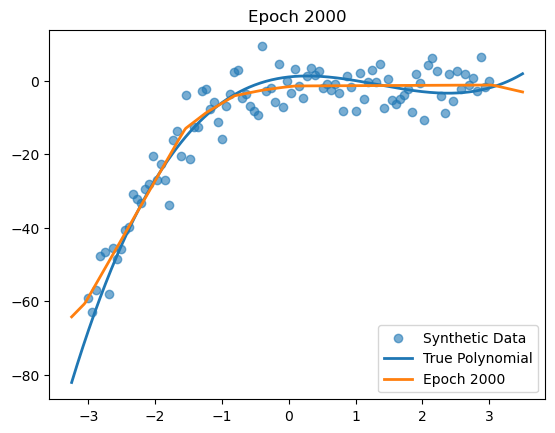

In [41]:
# Initialize lists to store plots
plots = []

# Training loop
epochs = 2001
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    
    # Zero gradients, backward pass, optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Visualization at specific epochs
    if epoch in [0, 50, 100, 150, 250, 500, 1000, 2000]:
        print(f'loss: {loss}')
        with torch.no_grad():
            y_pred_range = model(torch.FloatTensor(x_range).view(-1, 1)).numpy()
        plt.scatter(x_data, y_data, label='Synthetic Data', alpha=0.6)
        plt.plot(x_range, true_polynomial(x_range), label='True Polynomial', linewidth=2)
        plt.plot(x_range, y_pred_range, label=f'Epoch {epoch}', linewidth=2)
        plt.legend()
        plt.title(f'Epoch {epoch}')
        plt.show()


What does this show us?

It is an example of a neural network learning a function through optimising its parameters (weights & biases).
We see it starts off with a very poor approximation of the function which is gained through randomly 
initialising the parameters of the neural network. Then after each epoch (iteration) the result is better, at the start the improvements are huge and they diminish as the number of epochs increasses. 

So how does this happen? Anyone has it a guess?
Backpropogation!!!
In each epoch we call the method gradient